<a href="https://www.kaggle.com/code/utkarshx27/bladder-cancer-recurrence-patterns-outcomes?scriptVersionId=130626515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bladder-cancer-recurrences/bladder1.csv
/kaggle/input/bladder-cancer-recurrences/bladder2.csv
/kaggle/input/bladder-cancer-recurrences/bladder.csv


In [2]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=5893f0b2f87a30d0ca8fe0944478d2b1b96ddf1cde1db666b54473fc11010157
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [3]:
from lifelines import NelsonAalenFitter
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Info
The given dataset appears to be focused on bladder cancer and contains information related to recurrences of the disease. While a detailed description of the dataset is not provided, we can gather some insights from the available columns:

- "id" represents the unique identifier for each patient in the dataset.
- "treatment" denotes the type of treatment received by the patients, which includes options such as placebo, pyridoxine (vitamin B6), or thiotepa.
- "number" indicates the initial number of tumors detected, with a value of 8 or more representing eight or more tumors.
- "size" refers to the size of the largest initial tumor in centimeters.
- "recur" represents the number of recurrences observed for each patient.
- "start" and "stop" denote the start and end times of each interval during which events (recurrence or death) were recorded.
- "status" provides information about the end of the interval, including codes for censored data, recurrence, death from bladder disease, or death from other/unknown causes.
- "rtumor" represents the number of tumors found at the time of recurrence.
- "rsize" indicates the size of the largest tumor at the time of recurrence.
- "enum" represents the event number or observation number within each patient.

In [4]:
df = pd.read_csv("/kaggle/input/bladder-cancer-recurrences/bladder1.csv")
df.head()

,Unnamed: 0,id,treatment,number,size,recur,start,stop,status,rtumor,rsize,enum
0,1,1,placebo,1,1,0,0,0,3,.,.,1
1,2,2,placebo,1,3,0,0,1,3,.,.,1
2,3,3,placebo,2,1,0,0,4,0,.,.,1
3,4,4,placebo,1,1,0,0,7,0,.,.,1
4,5,5,placebo,5,1,0,0,10,3,.,.,1


# recurrent event analysis

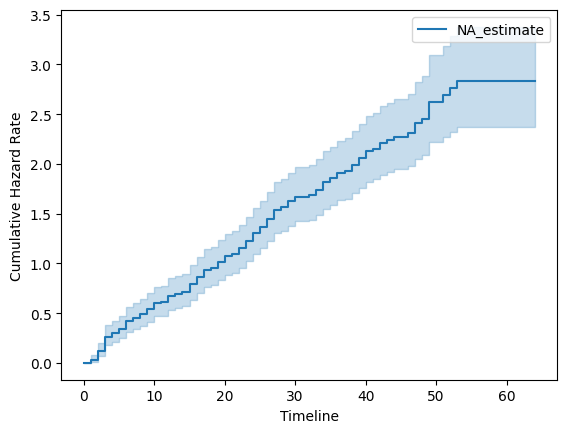

In [5]:
fitter = NelsonAalenFitter()
fitter.fit(df['stop'], event_observed=(df['status'] == 1), entry=df['start'])

fitter.plot_cumulative_hazard()
plt.xlabel('Timeline')
plt.ylabel('Cumulative Hazard Rate')
plt.show()

## observations:

- At the beginning of the timeline (timeline = 0.0), the cumulative hazard rate is 0. This indicates that there are no observed events (recurrences or deaths) at this point.

- As the timeline progresses, the cumulative hazard rate gradually increases. This suggests that the risk of recurrences or deaths from bladder disease increases over time.

- The cumulative hazard rate continues to rise until around timeline = 4.0, where it reaches a plateau. This suggests that the rate of recurrences or deaths from bladder disease stabilizes after this point.

- Beyond timeline = 4.0, the cumulative hazard rate remains relatively constant at approximately 2.83. This indicates that the risk of recurrences or deaths from bladder disease remains consistent after this time.

# Treatment Distribution

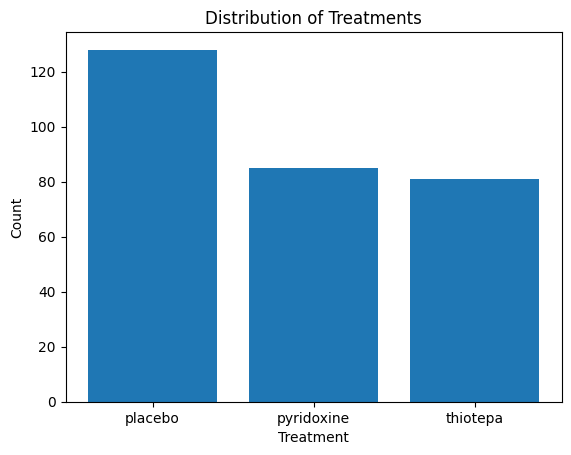

In [6]:
treatment_counts = df['treatment'].value_counts()

plt.bar(treatment_counts.index, treatment_counts.values)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Distribution of Treatments')
plt.show()

 # Initial Tumor Size vs. Number of Recurrences

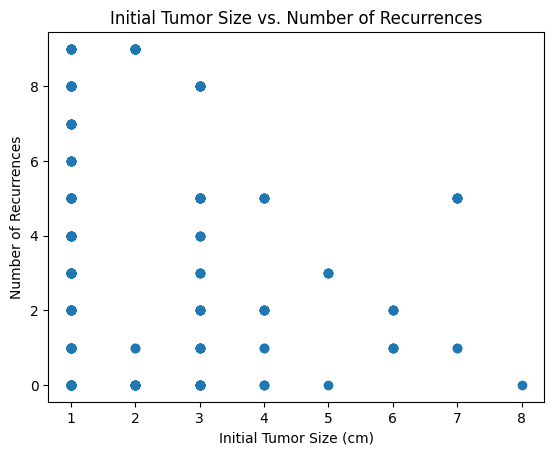

In [7]:
plt.scatter(df['size'], df['recur'])
plt.xlabel('Initial Tumor Size (cm)')
plt.ylabel('Number of Recurrences')
plt.title('Initial Tumor Size vs. Number of Recurrences')
plt.show()

# Pie Chart of Recurrence Status

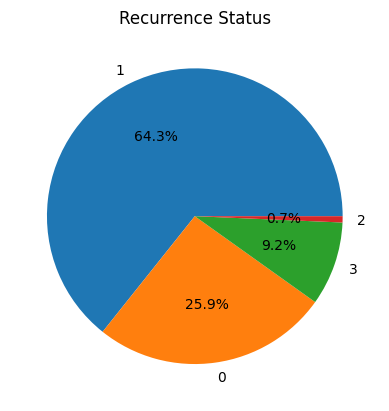

In [8]:
status_counts = df['status'].value_counts()

plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Recurrence Status')
plt.show()